W tym notebooku zaprezentowano działanie drzew decyzyjnych na podstawie zmiennej opisywanej "are_useful", która zbierała odpowiedzi na pytanie "Czy jesteś za wprowadzaniem takich systemów do swojego życia codziennego?". Wykonano drzewo bez oraz przy użyciu funkcji graficznych.

[Text(0.60703125, 0.9615384615384616, 'X[13] <= 1.5\ngini = 0.654\nsamples = 112\nvalue = [42, 43, 27]'),
 Text(0.3265625, 0.8846153846153846, 'X[0] <= 0.5\ngini = 0.614\nsamples = 88\nvalue = [39, 36, 13]'),
 Text(0.1125, 0.8076923076923077, 'X[32] <= 0.5\ngini = 0.529\nsamples = 33\nvalue = [6, 21, 6]'),
 Text(0.05, 0.7307692307692307, 'X[6] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(0.025, 0.6538461538461539, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.075, 0.6538461538461539, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.175, 0.7307692307692307, 'X[16] <= 0.5\ngini = 0.482\nsamples = 28\nvalue = [3, 19, 6]'),
 Text(0.125, 0.6538461538461539, 'X[4] <= 0.5\ngini = 0.406\nsamples = 24\nvalue = [3, 18, 3]'),
 Text(0.1, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.15, 0.5769230769230769, 'X[33] <= 2.5\ngini = 0.363\nsamples = 23\nvalue = [3, 18, 2]'),
 Text(0.125, 0.5, 'X[9] <= 0.5\ngini = 0.314\nsamples = 22\nvalue = [

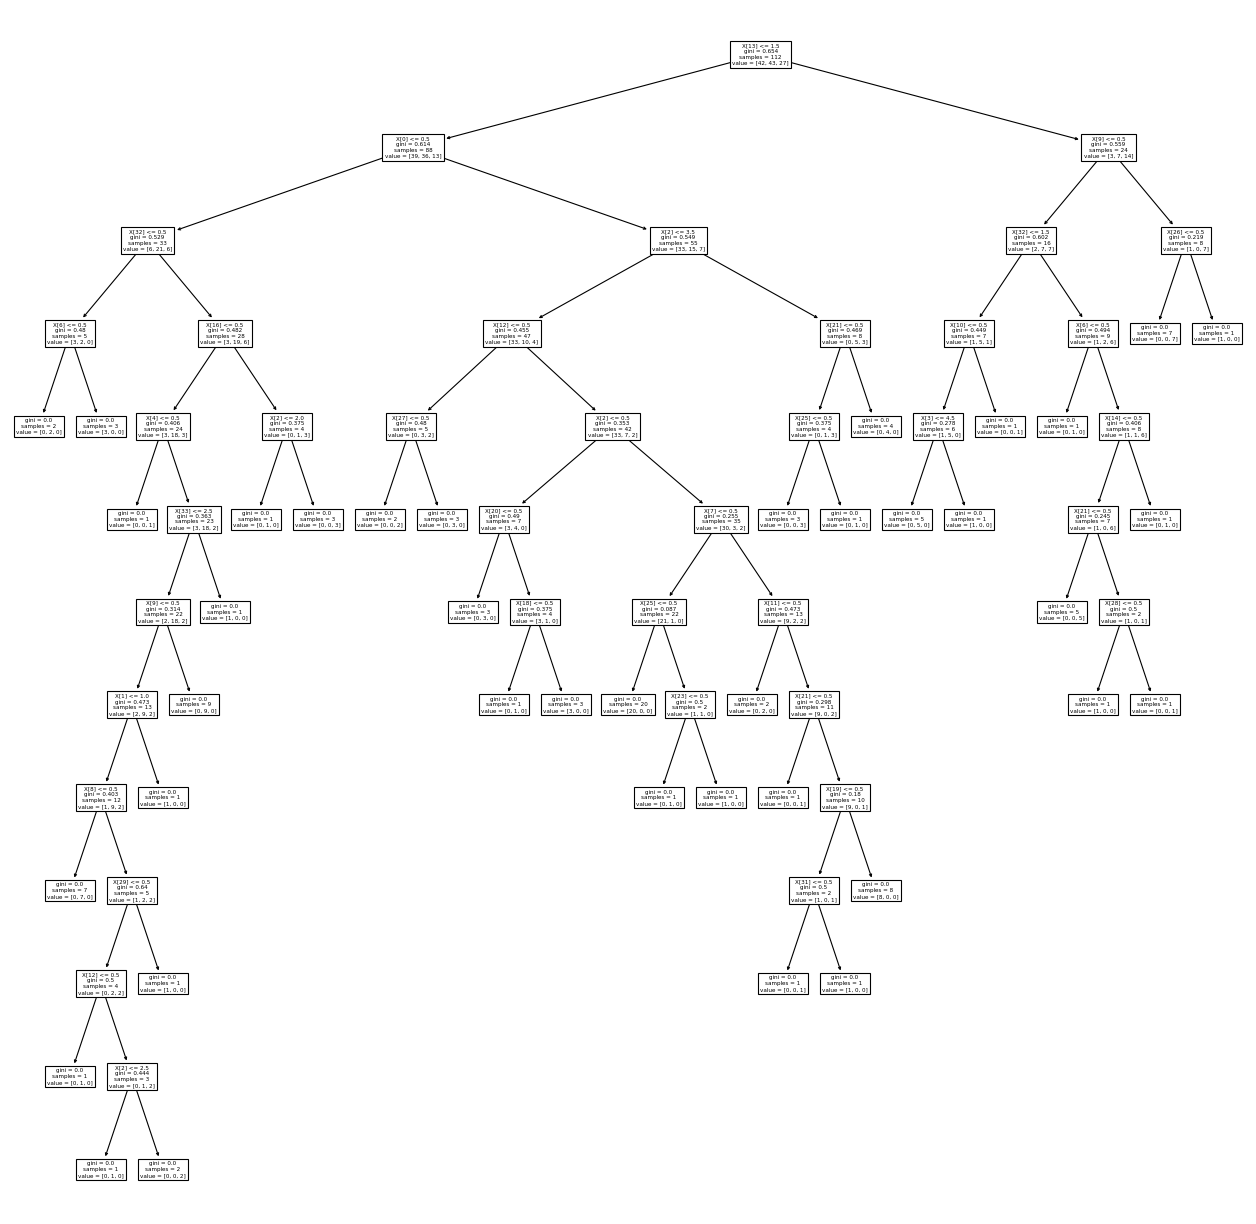

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

dataset = pd.read_csv('baza.csv', header = 0)
dataset = dataset.drop(['personid','fk_test','answers_id','result_id','answers_id.1'], axis=1)


lab_encoder = preprocessing.LabelEncoder()


y = dataset["are_useful"] # oddzielamy zmienną opisywaną
X = dataset.drop(["are_useful"], axis=1) # zmienna opisowa
enc = OrdinalEncoder()
X = enc.fit_transform(X)


clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, y) # budujemy drzewo


plt.figure(figsize=(20,20), dpi= 80)
tree.plot_tree(clf)

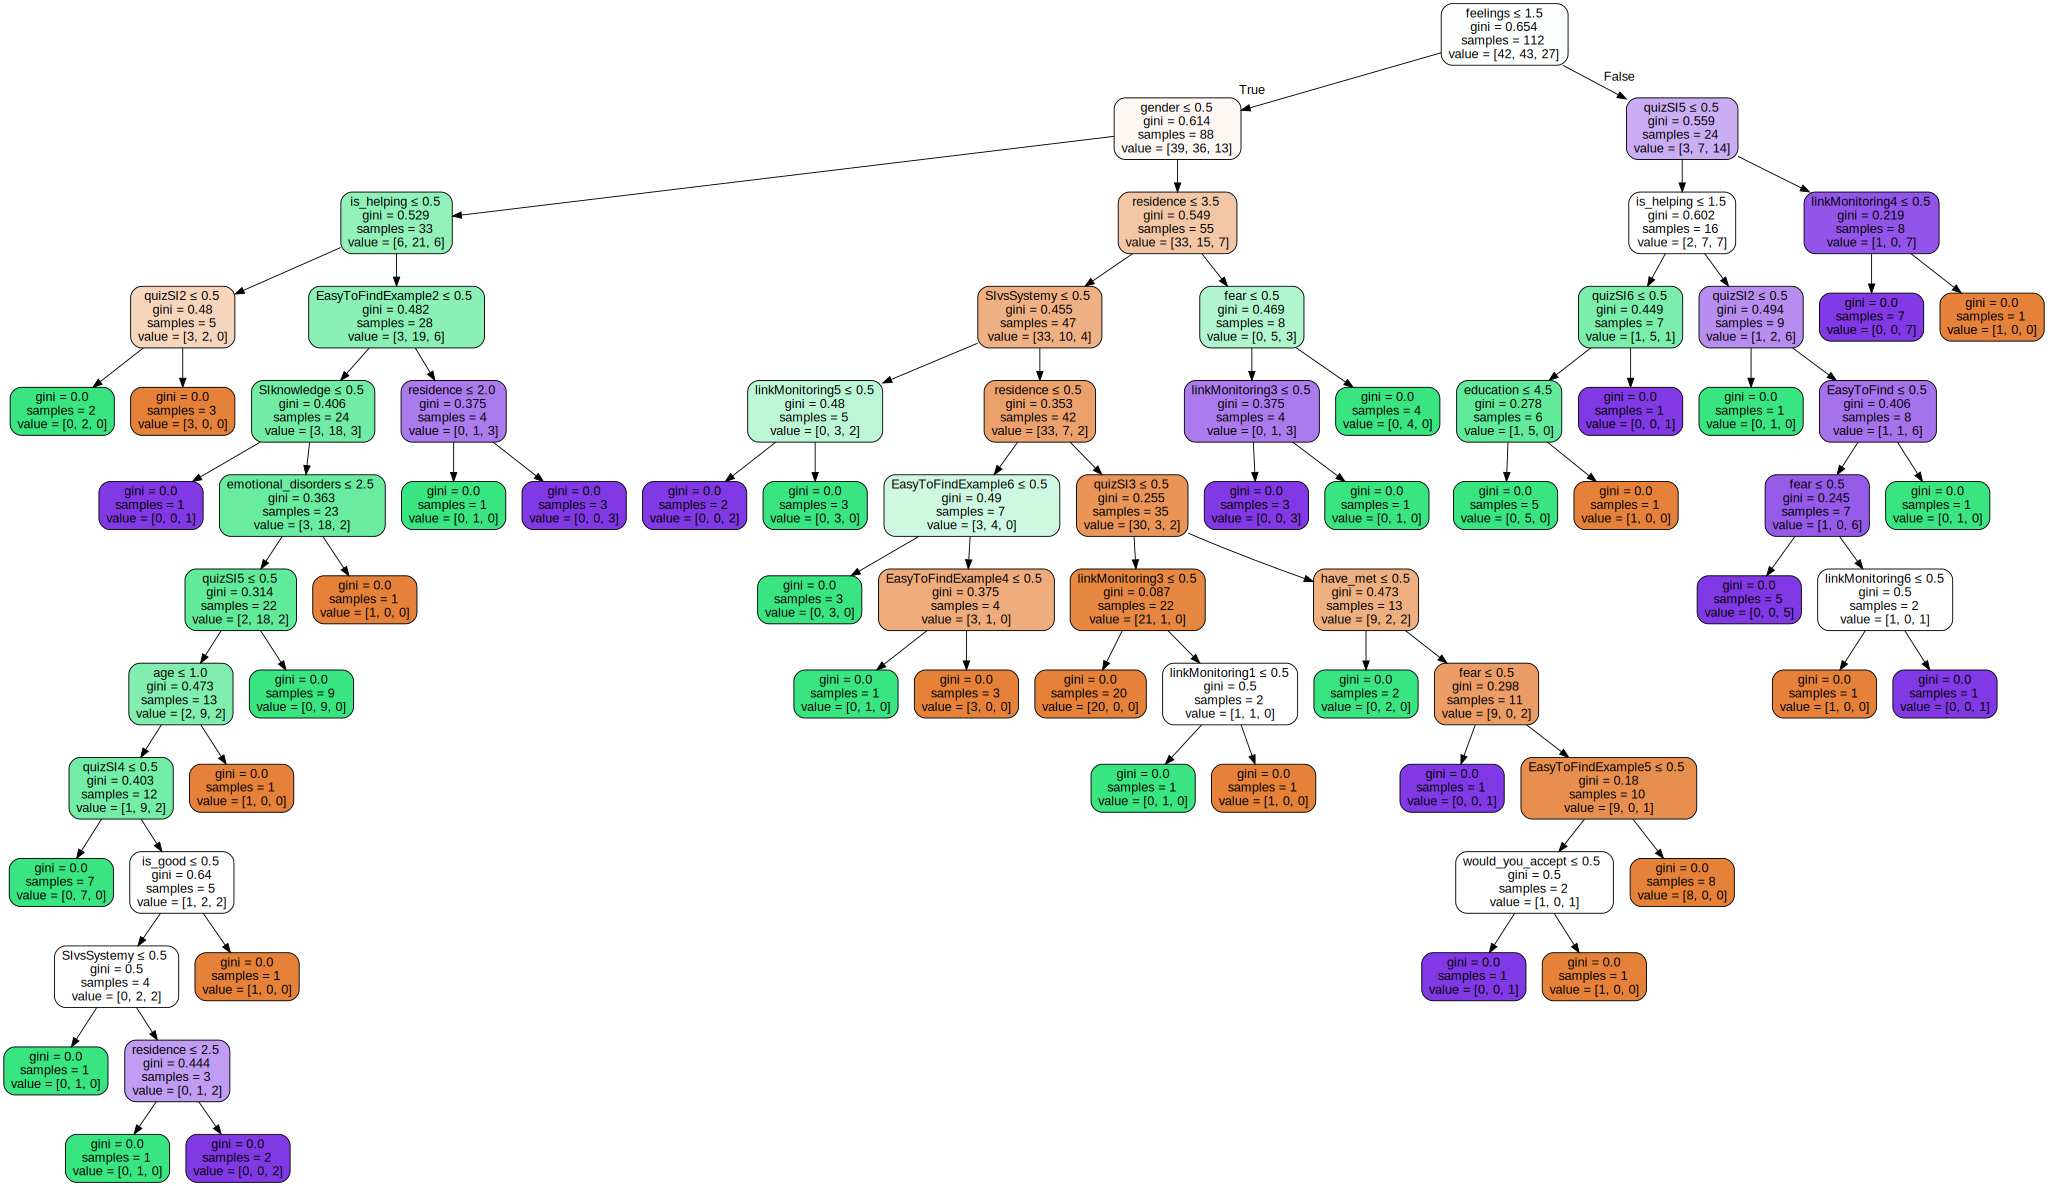

In [17]:
dataX = dataset.drop("are_useful", axis=1)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=dataX.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [18]:
graph.render(filename='output')

'output.pdf'